## Importing the libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


# Exercise 1 - Identifying Snarky Reddit Comments
## Text Mining (Pre-Processing, Exploratory Data Analysis, Text Pre-Processing, Machine Learning Models)

## 1 - Importing the datasets

0 - Means normal comment 

1 - Sarcastic comment

In [3]:
df_comment0 = pd.read_csv('COMENTARIOS_0.csv')
df_comment0.head(10)
df_comment0

,label,comment,author,subreddit,score,date,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...
505408,0,"Yeah, it's a GE P42DC, a diesel-electric locom...",rebelcommander,pics,2.0,2009-01,"You realize that's not really a steam engine, ..."
505409,0,Karma whore.,genuinepolitician,todayilearned,-2.0,2009-09,TIL: an interesting way to check for bad breath.
505410,0,Hi,mercurysquad,AskReddit,3.0,2009-03,I don't really need a notifier. The envelope i...
505411,0,so cool.,ImRtarded,AskReddit,1.0,2009-08,olds not old's


In [4]:
df_comment1 = pd.read_csv('COMENTARIOS_1.csv')
df_comment1.head(10)
df_comment1

,label,comment,author,subreddit,score,date,parent_comment
0,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting,0.0,2016-11,"The dumb thing is, they are risking their sell..."
1,1,wow it is totally unreasonable to assume that ...,pb2crazy,politics,2.0,2016-11,Clinton campaign accuses FBI of 'blatant doubl...
2,1,Ho ho ho... But Melania said that there is no ...,pb2crazy,politics,8.0,2016-10,Anyone else think that it was interesting the ...
3,1,I can't wait until @potus starts a twitter war...,kitduncan,politics,3.0,2016-11,Here's what happens when Obama gives up his Tw...
4,1,gotta love the teachers who give exams on the ...,DEP61,CFBOffTopic,3.0,2016-11,Monday night Drinking thread Brought to You by...
...,...,...,...,...,...,...,...
505408,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2.0,2009-04,"No one is calling this an engineered pathogen,..."
505409,1,"whatever you do, don't vote green!",BCHarvey,climate,1.0,2009-05,In a move typical of their recent do-nothing a...
505410,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1.0,2009-01,Screw the Disabled--I've got to get to Church ...
505411,1,The Slavs got their own country - it is called...,catsi,worldnews,1.0,2009-01,I've always been unsettled by that. I hear a l...


### Concatenate the datasets to have only one

In [5]:
df = pd.concat([df_comment0, df_comment1], axis=0)
df

,label,comment,author,subreddit,score,date,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...
505408,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2.0,2009-04,"No one is calling this an engineered pathogen,..."
505409,1,"whatever you do, don't vote green!",BCHarvey,climate,1.0,2009-05,In a move typical of their recent do-nothing a...
505410,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1.0,2009-01,Screw the Disabled--I've got to get to Church ...
505411,1,The Slavs got their own country - it is called...,catsi,worldnews,1.0,2009-01,I've always been unsettled by that. I hear a l...


## 3 - Treating Outliers

    The exercise says that there are outliers in 'score' column. Let's treat them with the mean.

In [6]:
df['score'].sort_values(ascending=False).head(20)

132       9999999.0
122       1000000.0
61328        9070.0
67384        7563.0
63485        5818.0
31584        5629.0
357653       5163.0
72744        4981.0
271328       4909.0
334854       4776.0
249849       4709.0
57346        4648.0
151709       4609.0
207869       4574.0
377647       4286.0
54373        4262.0
295590       4194.0
255047       4118.0
176263       4057.0
176467       4043.0
Name: score, dtype: float64

In [7]:
df[df['score'] < 9080]['score'].mean()

6.885699728932946

In [8]:
# Applying the mean outside the outiliers to the outliers
df['score'] = np.where(df['score'] > 9080, df[df['score'] < 9080]['score'].mean(), df['score'])

In [9]:
df['score'].sort_values(ascending=False).head(20)

61328     9070.0
67384     7563.0
63485     5818.0
31584     5629.0
357653    5163.0
72744     4981.0
271328    4909.0
334854    4776.0
249849    4709.0
57346     4648.0
151709    4609.0
207869    4574.0
377647    4286.0
54373     4262.0
295590    4194.0
255047    4118.0
176263    4057.0
176467    4043.0
366259    4010.0
235261    3906.0
Name: score, dtype: float64

## 3 - Treating Missing Values

    The exercise says that there are missing values in 'score' and 'subreddit' column.

In [10]:
# Checking the null values
df.isnull().sum()

label              0
comment           53
author             0
subreddit          3
score              4
date               0
parent_comment     0
dtype: int64

In [11]:
# As the null values are really few, I'm gonna remove them.
df.dropna(inplace=True)

In [12]:
# Checking the null values
df.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
date              0
parent_comment    0
dtype: int64

In [13]:
# Checking the shape
df.shape

(1010766, 7)

### 4 - Creating dummies for comment and parent comments

In [14]:
# Creating an variable with the total words for each comment and for each parent_comment
df['comment_wcount'] = df['comment'].str.split().str.len()

df['parent_comment_wcount'] = df['parent_comment'].str.split().str.len()

In [15]:
# Creating an variable with the total characteres for each comment and for each parent_comment
df['comment_char'] = df['comment'].apply(len)

df['parent_comment_char'] = df['parent_comment'].apply(len)

In [16]:
df.head(5)

,label,comment,author,subreddit,score,date,parent_comment,comment_wcount,parent_comment_wcount,comment_char,parent_comment_char
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ...",3,17,10,80
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...,14,27,74,134
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.,19,4,121,23
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz,12,5,60,26
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...,7,18,31,85


## Data analysis (preliminary)

### 1 - Percentage, what is the volume of sarcastic comments?

In [17]:
print(f"The total of sarcastic comments in percentage is {(df[df['label'] == 0]['label'].count()) / (df['label'].count()) *100:.0f}%")

The total of sarcastic comments in percentage is 50%


### 2 - Which author comments the most with sarcasm?

In [18]:
df[df['label'] == 1].groupby(['author'])[['label']].sum().sort_values(by='label', ascending=False).head(1)

,label
author,
Biffingston,422


### 3 - Over time has sarcastic comments increased or decreased? Plot a graph of your choice to show the evolution.

In [19]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
sarc_comment_years = []

for year in years:
    df_date = df[df['date'].str.slice(start=0, stop=4, step=1) == year]
    print(f"Ano de {year}: {df_date[df_date['label'] == 1].groupby(['date'])['label'].count().sum()}")
    sarc_comment_years.append(df_date[df_date['label'] == 1].groupby(['date'])['label'].count().sum())


Ano de 2009: 1078
Ano de 2010: 2977
Ano de 2011: 6944
Ano de 2012: 14592
Ano de 2013: 34193
Ano de 2014: 73506
Ano de 2015: 149297
Ano de 2016: 222781


<AxesSubplot:>

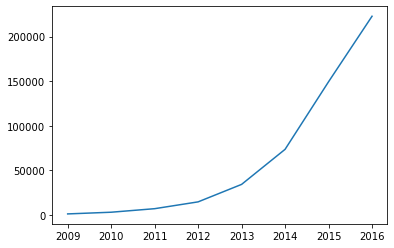

In [20]:
sns.lineplot(x=years, y=sarc_comment_years)

### 3.1  - Percentage, over time has sarcastic comments increased or decreased? Plot a graph of your choice to show the evolution.

In [21]:
percentuais_mes = pd.DataFrame()
percentuais_mes['qtd'] = df.groupby('date')['date'].count()
percentuais_mes['qtd_sarc'] = df[df['label'] == 1].groupby('date')['label'].count()
percentuais_mes['%'] = round((percentuais_mes['qtd_sarc']/percentuais_mes['qtd'])*100, 1)
percentuais_mes.head()

,qtd,qtd_sarc,%
date,,,
2009-01,104,72,69.2
2009-02,89,57,64.0
2009-03,105,70,66.7
2009-04,122,71,58.2
2009-05,110,68,61.8


<AxesSubplot:xlabel='date'>

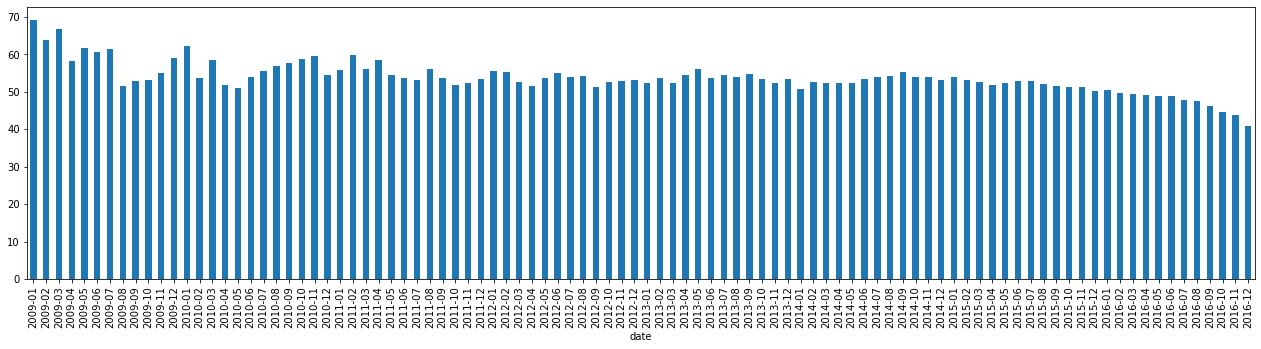

In [22]:
plt.figure(figsize=(22,5))
percentuais_mes['%'].plot.bar()

### 4 - As a percentage, looking at the subreddit variable, which topic generates the most sarcastic comments? Only consider topics with more than 1000 comments.

In [23]:
percentuais_sub = pd.DataFrame()
percentuais_sub['qtd'] = df.groupby('subreddit')['subreddit'].count()
percentuais_sub['qtd_sarc'] = df[df['label'] == 1].groupby('subreddit')['subreddit'].count()
percentuais_sub['%'] = round((percentuais_sub['qtd_sarc']/percentuais_sub['qtd'])*100, 1)
percentuais_sub[percentuais_sub['qtd'] > 1000].sort_values('%', ascending=False).head(1)

,qtd,qtd_sarc,%
subreddit,,,
creepyPMs,5466,4287.0,78.4


### 5 - By type of comment (sarcastic or otherwise), how many words do we average in comment_wcount and parent_comment_wcount?

In [24]:
df.groupby(['label'])[['comment_wcount', 'parent_comment_wcount']].mean()

,comment_wcount,parent_comment_wcount
label,,
0,10.592042,24.562958
1,10.330915,24.211416


### 6 - Are sarcastic comments a major or minor factor compared to normal comments? Use the comment_char field created earlier to show this relationship through distribution graphs.

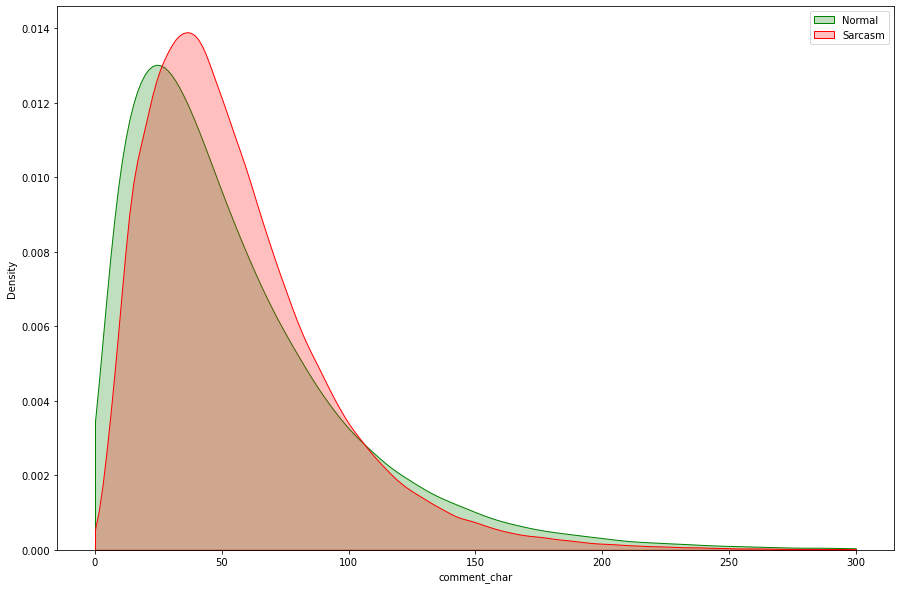

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(df[df['label'] == 0]['comment_char'], shade=True, label='Normal', color='green', clip = (0,300), ax=ax)
sns.kdeplot(df[df['label'] == 1]['comment_char'], shade=True, label='Sarcasm', color='red', clip = (0,300), ax=ax)
ax.legend(loc='upper right')
plt.show()

### 7 - If the same comment and parent_comment are in a single message, in percentage on average, how much would comment represent in relation to the united message. Use the comment_char and parent_comment_char fields we created earlier.

In [36]:
print(f"{((df['comment_char'] / (df['comment_char'] + df['parent_comment_char']))*100).mean():.2f}% would be comments")

38.42% would be comments


## Text Mining Pre-Processing

    I'm gonna create a sample of the dataset as the original one is very big.

In [39]:
df_sample = df.sample(frac=0.005, replace=True, random_state=1).copy()
df_sample.reset_index(inplace=True, drop=True)
df_sample

,label,comment,author,subreddit,score,date,parent_comment,comment_wcount,parent_comment_wcount,comment_char,parent_comment_char
0,0,ayy lmao,FPSreznov,pakistan,2.0,2016-06,His excellency Nawaz Sharif sacrificing his he...,2,111,8,682
1,0,I find it most funny when people here try to p...,i-hate-mormons,AskReddit,9.0,2012-08,Humor is not limited to only what you find fun...,19,101,102,517
2,0,"Never self medicate while having cancer, I dou...",roionsteroids,Drugs,1.0,2013-09,Cannabanoids cure cancer? Which ones? So we al...,20,135,127,692
3,1,Because if you're a woman once you have a kid ...,onecharmingschmuck,justneckbeardthings,40.0,2015-09,"'Slob bitches' go to 'the club', yet claim to ...",27,15,133,84
4,0,in my country these pads cost about US$ 35. wh...,sanriver12,buildapcsales,1.0,2013-07,SteelSeries QcK Gaming Mouse Pads (Various Sty...,12,19,56,119
...,...,...,...,...,...,...,...,...,...,...,...
5049,1,As we know most people leave their phones at h...,Indestructavincible,technology,1.0,2015-03,Decent use for a smart watch is to full out re...,14,14,77,67
5050,0,Stamper has the voice of an angel.,ThatUndeadDude,fivenightsatfreddys,1.0,2016-07,Someone please make an SFM animation of Golden...,7,11,34,66
5051,1,"But if they didn't pay that CEO $5m, he wouldn...",pramjockey,politics,2.0,2016-07,Yes. And then these same corporations lobby fo...,17,68,88,404
5052,1,I really don't need a second reference point t...,sleaze_bag_alert,news,1.0,2016-10,"They did the same in Saint Petersburg, FL and ...",20,27,100,146


### 1 - Function to remove punctuations, stopwords and stemming

In [46]:
def text_transform(msg):
    
    # For each character of the comment, let's remove punctuations
    without_punc = [char for char in msg if char not in string.punctuation]
    
    # Join the characters
    without_punc = ''.join(without_punc)
    
    # Remove Stop Words
    without_stop_word = [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]
    
    # Normalization
    st = PorterStemmer()
    return [st.stem(stPalavra) for stPalavra in without_stop_word]

In [47]:
# Applying the transformation function
df_sample['comment'].apply(text_transform).head()

0                                          [ayi, lmao]
1    [find, funni, peopl, tri, pretend, theyv, date...
2    [never, self, medic, cancer, doubt, ever, huma...
3    [your, woman, kid, forbidden, sort, fun, anyth...
4                   [countri, pad, cost, us, 35, scam]
Name: comment, dtype: object

### 2 - Text Vectorization (Word Count)

#### 2.1 - Vectorize 

    I'm gonna use the sklearn library feature_extraction and the class CountVectorizer

In [49]:
# Fitting 
vector_wc = CountVectorizer(analyzer=text_transform).fit(df_sample['comment'])

In [50]:
# Vectorizing the comments
comments_vector_wc = vector_wc.transform(df_sample['comment'])

In [51]:
comments_vector_wc.shape

(5054, 7182)

#### 2.2 - Converting the vectorized into a Data Frame for future ML

In [54]:
# First, is necessary to transform the matrix into a data frame
df_sample_wc_pandas = pd.DataFrame(comments_vector_wc.todense(), columns=vector_wc.get_feature_names_out())

# Concatening with the label
df_sample_wc = pd.concat([df_sample['label'], df_sample_wc_pandas], axis=1)

df_sample_wc

,label,0,01,03,05,06,07,08,0h,0x57,...,zodiac,zojirushi,zombi,zomg,zone,zucc,zucchini,zulu,zygi,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5051,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3 - Text Vectorization (TF-IDF)

    I'm gonna create a vectorization for TF-IDF, that is almost the same way I did for Word Count. But, before perform this one, is necessary to have the Word Count Vectorization first. The library used will be the sklearn TfidTransformer
    
    The pipeline is:
        - Fitting the WC Vectorized matrix
        - Create a new matrix
        - Convert the matrix into a Pandas Dataframe

#### 3.1 - Vectorizing

In [63]:
#Fitting the WC Vectorized matrix
vector_tfidf = TfidfTransformer().fit(comments_vector_wc)

#Create a new matrix
comments_vector_tfidf = vector_tfidf.transform(comments_vector_wc)

comments_vector_tfidf.shape

(5054, 7182)

#### 3.2 Converting the matrix into a DF

In [64]:
# First, is necessary to transform the matrix into a data frame
df_sample_tfidf_pandas = pd.DataFrame(comments_vector_tfidf.todense(), columns=vector_wc.get_feature_names_out())

# Concatening with the label
df_sample_tfidf = pd.concat([df_sample['label'], df_sample_tfidf_pandas], axis=1)

df_sample_tfidf

,label,0,01,03,05,06,07,08,0h,0x57,...,zodiac,zojirushi,zombi,zomg,zone,zucc,zucchini,zulu,zygi,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5050,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5051,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What are the top 10 words with biggest TF-IDF values?

In [67]:
# Defining the words as index and creating a TF-IDF value column
top_10_tfidf = pd.DataFrame(vector_tfidf.idf_, index=vector_wc.get_feature_names_out(), columns=['TF-IDF'])

In [68]:
# There are a value of TF-IDF for each distinct word of corpus
top_10_tfidf.sort_values(by=['TF-IDF'], ascending=False).head(10)

,TF-IDF
kywe,8.834986
modric,8.834986
modern,8.834986
modder,8.834986
moblin,8.834986
moat,8.834986
mo,8.834986
mn,8.834986
mmr,8.834986
mmo,8.834986
